In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
url = 'https://raw.githubusercontent.com/carloslizarragac/FisicaComputacional1/master/Actividad1/3061.txt'

my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

df_work0 = df_dist.copy()

str_Nulo = 'Nulo'
df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)

cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_work1[cols] = pd.to_numeric(df_work1[cols], errors='coerce')

df_work2 = df_work1.copy()

df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'], dayfirst=True).copy()

df_work2['Año'] = df_work2['Fecha'].dt.year
df_work2['Mes'] = df_work2['Fecha'].dt.month

df_meteo = df_work2.copy()
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29804 entries, 0 to 29803
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   29804 non-null  datetime64[ns]
 1   Precip  29786 non-null  float64       
 2   Evap    1389 non-null   float64       
 3   Tmax    29723 non-null  float64       
 4   Tmin    29724 non-null  float64       
 5   Año     29804 non-null  int64         
 6   Mes     29804 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 1.6 MB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1929-11-01     0.0   NaN  26.0  19.0  1929   11
1 1929-11-02     0.0   NaN  27.0  18.0  1929   11
2 1929-11-03     0.0   NaN  25.0  18.0  1929   11
3 1929-11-04     0.0   NaN  24.0  17.0  1929   11
4 1929-11-05     0.0   NaN  22.0  15.0  1929   11
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
29799 2017-12-27     0.0   NaN  21.5  16.0  2017   12
29800 2017-12-28   

In [42]:
                                          #Actividad 1:

print("Numero de renglones y  columnas:",df_meteo.shape,"\n" )


print("Matriz con los tipos de columnas del dataframe \n")
print(df_meteo.dtypes,"\n")


print("Primeros 5 renglones del dataframe \n")
print(df_meteo.head(),"\n")


print("Ultimo 5 renglones del dataframe \n")
print(df_meteo.tail(),"\n")


print("Regresa 5 renglones aleatorios \n")
print(df_meteo.sample(5) ,"\n")


print("Matriz con informacion general del datafframe \n")
print(df_meteo.info(),"\n")


print("Estadisticas generales del dataframe \n")
print(df_meteo.describe(),"\n")


print("Numero de datos nulos \n")
print(df_meteo.isnull().sum(),"\n")

#df_meteo.describe(include='object') esta funcion ya no la podemos usar porque mas arriba convertimos todos los objetos en objetos y ademas estas variables tipo categoricas no 
#algo que las identifique en sus valores y por ende no son de interes ya que son numericas

##Caracterizacion
#La matriz tiene 7 caracteristicas diferenciables con mas de 20 mil renglones cada una, por lo tanto podemos decir que tenemos muchos datos, ya que ademas
#si revisamos las fechas tenemos informacion desde 1929 hasta 2017, ya tenemos el formato de cada columna (caracteristica) en algun tipo de variable y por lo tanto ya 
#podemos trabajar en el, solo se tienen alrededor de 1000 datos de la evaporacion de la zona de todo el registro historico y los demas son nulos, ademas nos dan caracteristicas
#que se pueden correlacionar con otras como lo son año y mes con las demas columnas y revisar particularmente cada una, ademas curiosamente los valores de precipitacion el 75%
#son igual a 0, por lo cual no tenemos muchos datos de la precipitacion y no sabemos si no lo anotaron porque no lo consideraban tan importante o no tenian la capacidad de medirlo
#eficientemente o si en realidad todos son ceros que es lo mas probable, ademas sera lo que asumiremos, ademas es curioso que su promedio y desviacion tipica este en 0 y 1 del 
#promedio y alrededor de 4 en std respectivamente, ademas parece que el dato de valor maximo de 280 es anormal porque buscandolo en la base de datos no encontro ninguno, las demas
#columnas presentan variabilidad y no es necesario tomar en cuenta las de mes y año porque son variables categoricas mas que numericas

Numero de renglones y  columnas: (29804, 7) 

Matriz con los tipos de columnas del dataframe 

Fecha     datetime64[ns]
Precip           float64
Evap             float64
Tmax             float64
Tmin             float64
Año                int64
Mes                int64
dtype: object 

Primeros 5 renglones del dataframe 

       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1929-11-01     0.0   NaN  26.0  19.0  1929   11
1 1929-11-02     0.0   NaN  27.0  18.0  1929   11
2 1929-11-03     0.0   NaN  25.0  18.0  1929   11
3 1929-11-04     0.0   NaN  24.0  17.0  1929   11
4 1929-11-05     0.0   NaN  22.0  15.0  1929   11 

Ultimo 5 renglones del dataframe 

           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
29799 2017-12-27     0.0   NaN  21.5  16.0  2017   12
29800 2017-12-28     0.0   NaN  24.5  17.0  2017   12
29801 2017-12-29     0.0   NaN  23.0  17.0  2017   12
29802 2017-12-30     0.0   NaN  26.0  19.0  2017   12
29803 2017-12-31     0.0   NaN  26.0  17.0  2017   12 

Regresa 5 reng

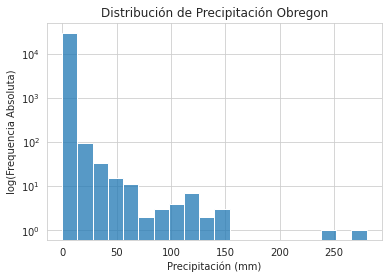

In [177]:


sns.set_style("whitegrid")
plt.xlabel('Precipitación (mm)')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución de Precipitación Obregon')
sns.histplot(data=df_meteo, x='Precip', bins=20,log_scale=(False,True));



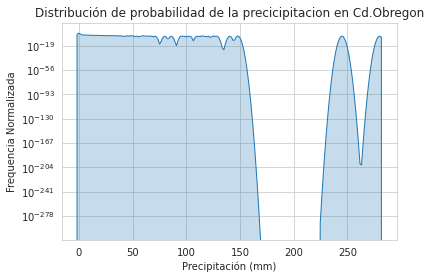

In [180]:

sns.set_style("whitegrid")

sns.kdeplot(df_meteo.Precip, fill=True,log_scale=(False,True));

plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de probabilidad de la precicipitacion en Cd.Obregon')

plt.show()


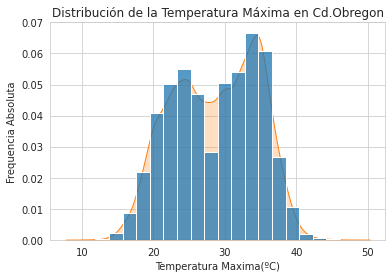

In [181]:
sns.set_style("whitegrid")

sns.histplot(data=df_meteo, x='Tmax', bins=20,stat='density');
sns.kdeplot(df_meteo.Tmax, fill=True);

plt.xlabel('Temperatura Maxima(ºC)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Temperatura Máxima en Cd.Obregon')

plt.show()

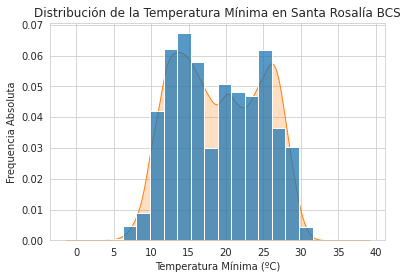

In [120]:
sns.set_style("whitegrid")

sns.histplot(data=df_meteo, x='Tmin', bins=20,stat='density');
sns.kdeplot(df_meteo.Tmin, fill=True);

plt.xlabel('Temperatura Mínima (ºC)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Temperatura Mínima en Santa Rosalía BCS')

plt.show()

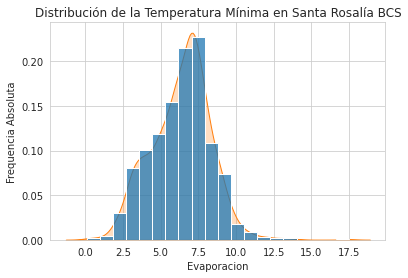

In [132]:
sns.set_style("whitegrid")

sns.histplot(data=df_meteo, x='Evap', bins=20,stat='density');
sns.kdeplot(df_meteo.Evap, fill=True);

plt.xlabel('Evaporacion')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Temperatura Mínima en Santa Rosalía BCS')

plt.show()

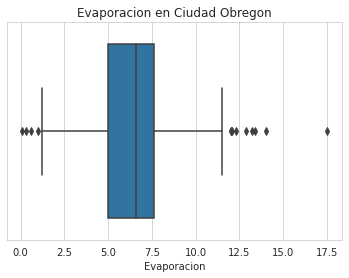

In [134]:
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo.Evap, data=df_meteo, orient='h').set(xlabel='Evaporacion', 
                                                     title='Evaporacion en Ciudad Obregon');

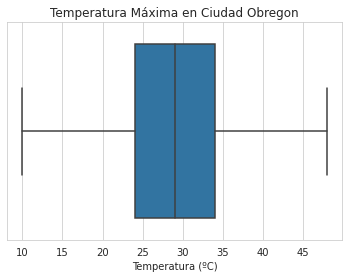

In [136]:
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo.Tmax, data=df_meteo, orient='h').set(xlabel='Temperatura (ºC)', 
                                                     title='Temperatura Máxima en Ciudad Obregon');

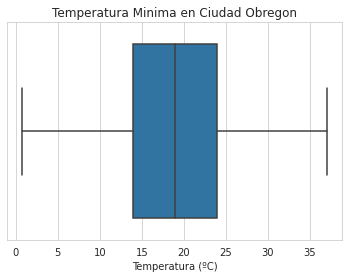

In [138]:
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo.Tmin, data=df_meteo, orient='h').set(xlabel='Temperatura (ºC)', 
                                                     title='Temperatura Minima en Ciudad Obregon');

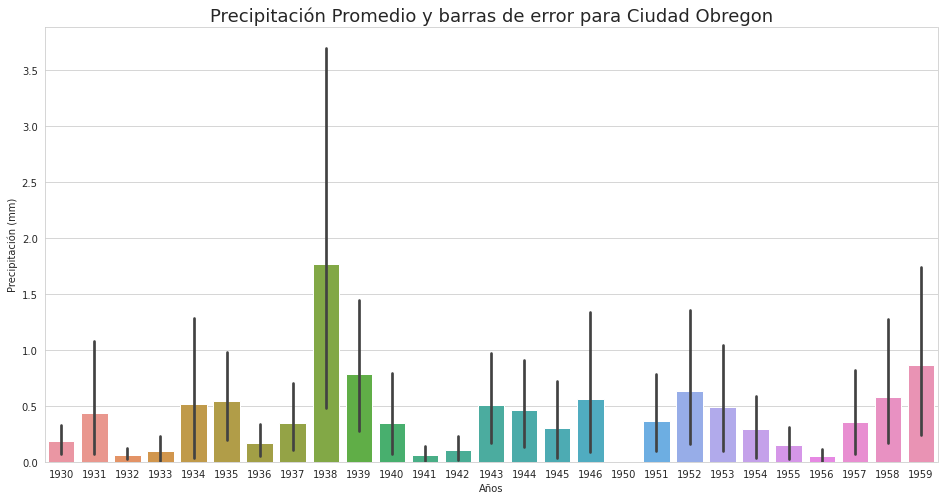

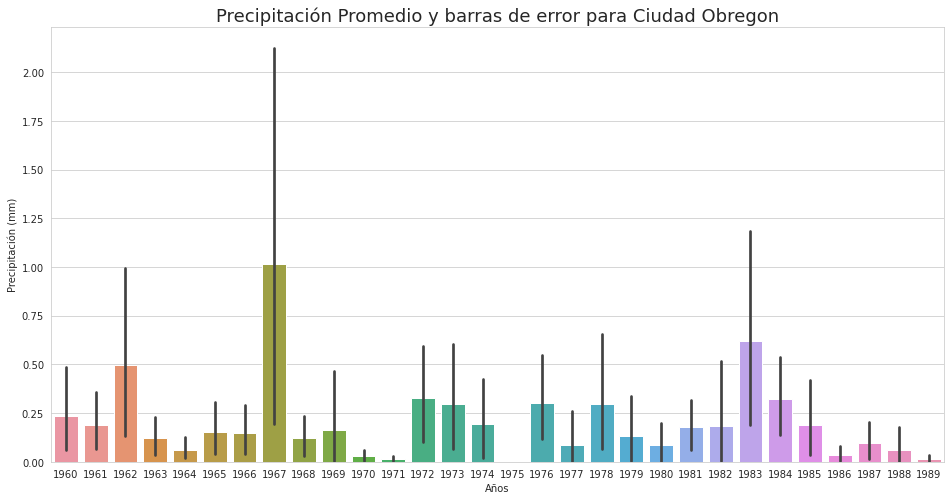

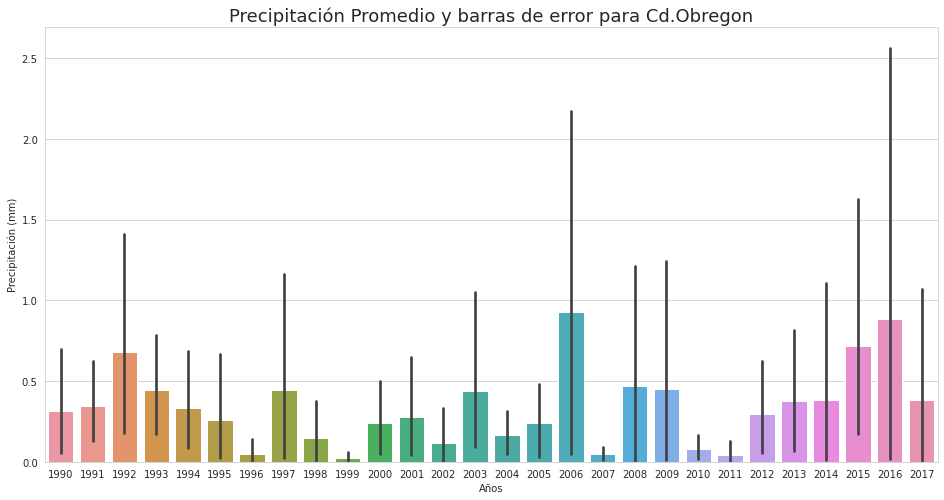

In [163]:
df_30 = df_meteo[(df_meteo['Año'] >= 1930) & (df_meteo['Año'] < 1960)]
df_60 = df_meteo[(df_meteo['Año'] >= 1960) & (df_meteo['Año'] < 1990)]
df_90 = df_meteo[(df_meteo['Año'] >= 1990) & (df_meteo['Año'] < 2018)]


sns.set_style('whitegrid')
plt.figure(figsize=(16,8))


g=sns.barplot(x='Año', y='Precip', data=df_30);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Ciudad Obregon', fontsize=18)

plt.show()


sns.set_style('whitegrid')
plt.figure(figsize=(16,8))


g=sns.barplot(x='Año', y='Precip', data=df_60);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Ciudad Obregon', fontsize=18)

plt.show()


sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Año', y='Precip', data=df_90);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Cd.Obregon', fontsize=18)

plt.show()

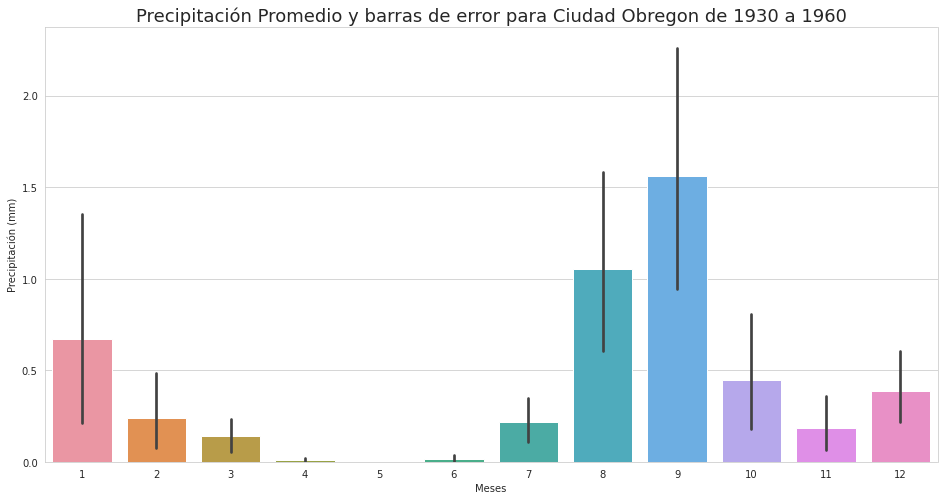

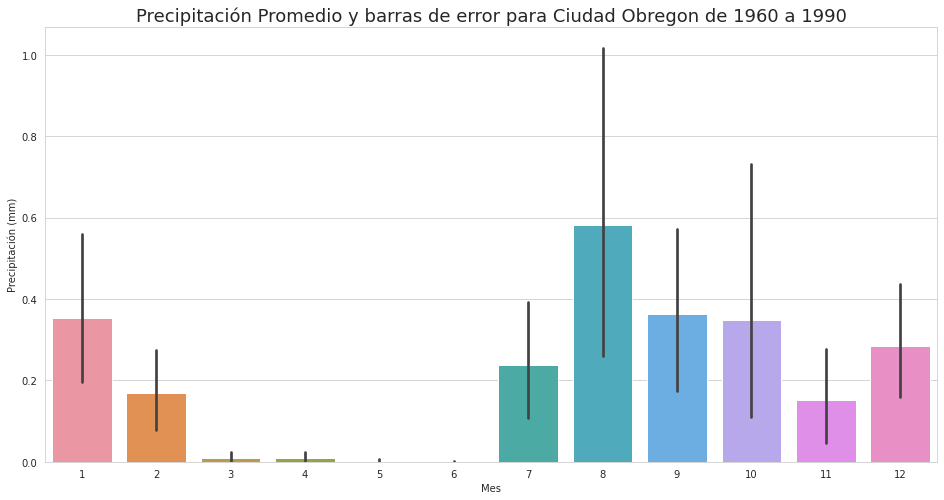

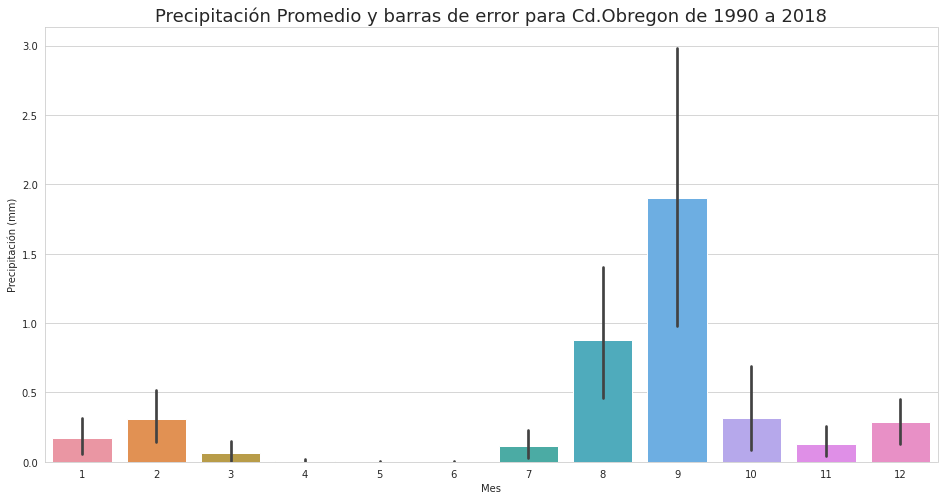

In [168]:
df_30 = df_meteo[(df_meteo['Año'] >= 1930) & (df_meteo['Año'] < 1960)]
df_60 = df_meteo[(df_meteo['Año'] >= 1960) & (df_meteo['Año'] < 1990)]
df_90 = df_meteo[(df_meteo['Año'] >= 1990) & (df_meteo['Año'] < 2018)]


sns.set_style('whitegrid')
plt.figure(figsize=(16,8))


g=sns.barplot(x='Mes', y='Precip', data=df_30);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Ciudad Obregon de 1930 a 1960', fontsize=18)

plt.show()


sns.set_style('whitegrid')
plt.figure(figsize=(16,8))


g=sns.barplot(x='Mes', y='Precip', data=df_60);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Mes')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Ciudad Obregon de 1960 a 1990', fontsize=18)

plt.show()



sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Mes', y='Precip', data=df_90);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Mes')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Cd.Obregon de 1990 a 2018', fontsize=18)

plt.show()

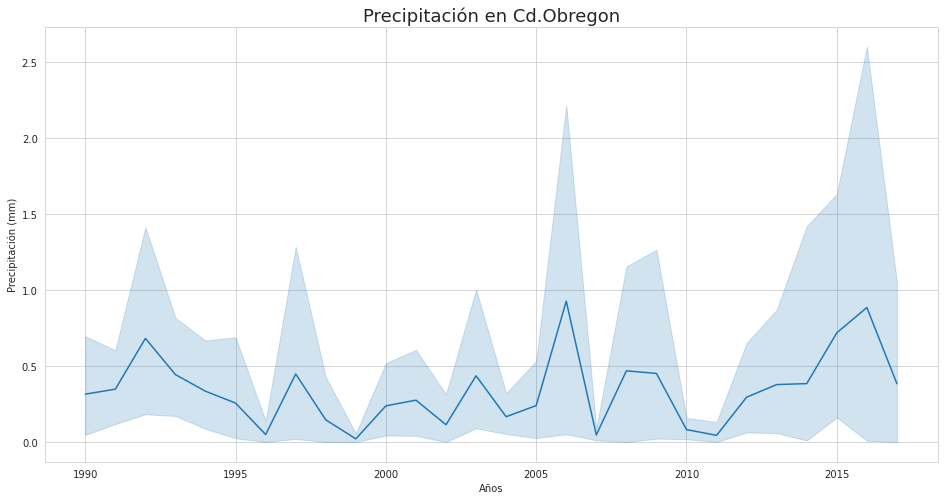

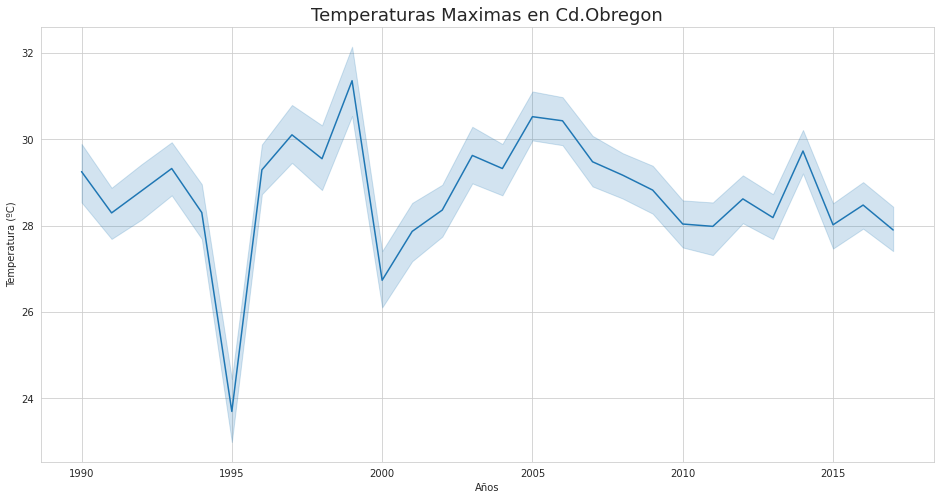

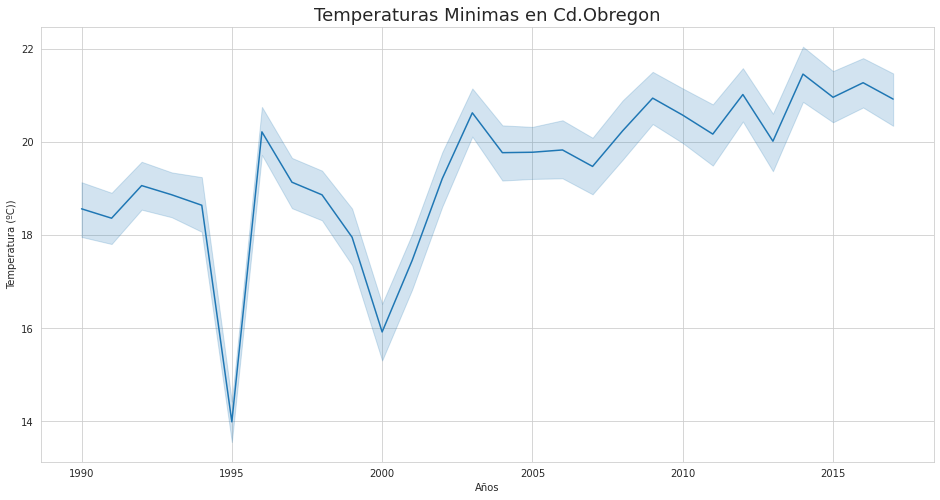

In [169]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.lineplot(x='Año', y='Precip', data=df_90);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación en Cd.Obregon', fontsize=18)

plt.show()




sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.lineplot(x='Año', y='Tmax', data=df_90);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Temperatura (ºC)')
plt.title('Temperaturas Maximas en Cd.Obregon', fontsize=18)

plt.show()




sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.lineplot(x='Año', y='Tmin', data=df_90);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Temperatura (ºC))')
plt.title('Temperaturas Minimas en Cd.Obregon', fontsize=18)

plt.show()

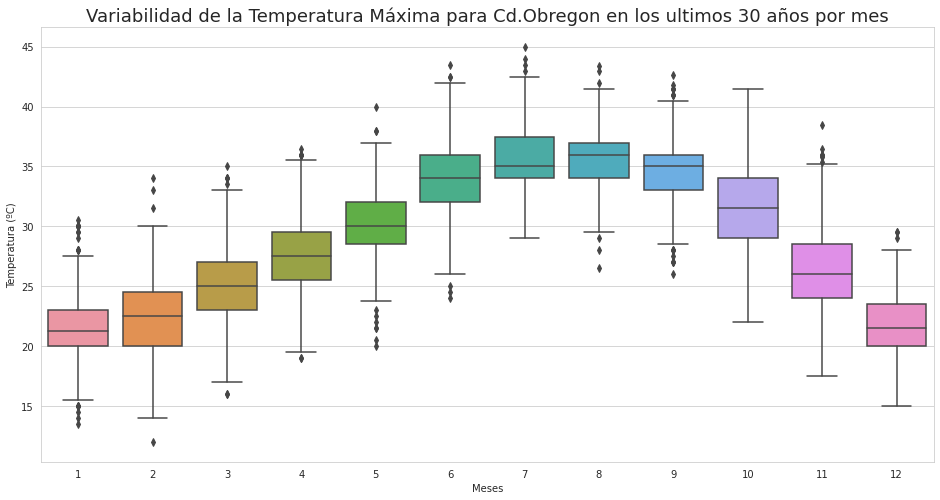

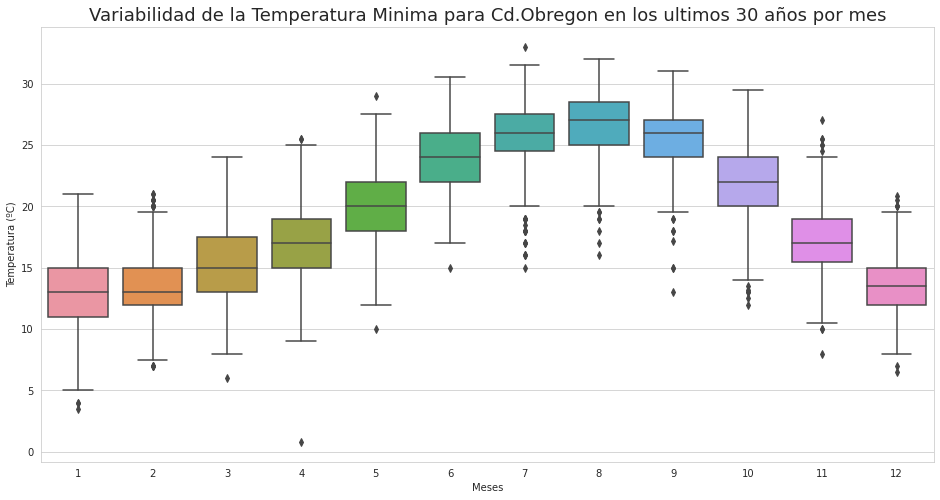

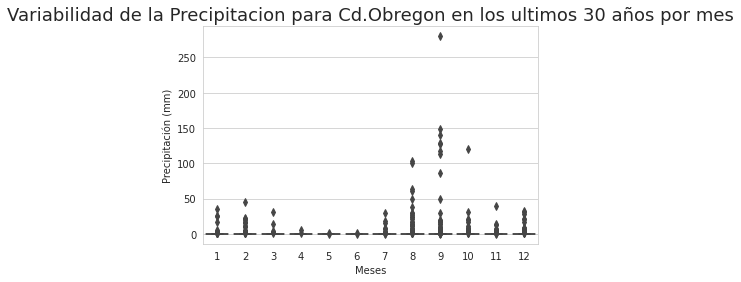

In [183]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.boxplot(x='Mes', y='Tmax', data=df_90);

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Máxima para Cd.Obregon en los ultimos 30 años por mes', fontsize=18)

plt.show()




sns.set_style('whitegrid')
plt.figure(figsize=(16,8))


g=sns.boxplot(x='Mes', y='Tmin', data=df_90);

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Minima para Cd.Obregon en los ultimos 30 años por mes', fontsize=18)

plt.show()



g=sns.boxplot(x='Mes', y='Precip', data=df_90);

plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Variabilidad de la Precipitacion para Cd.Obregon en los ultimos 30 años por mes', fontsize=18)

plt.show()